# 聚类

In [2]:
# beer dataset 

import pandas as pd 
beer=pd.read_csv('data.txt',sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [4]:
X=beer[['calories','sodium','alcohol','cost']]

In [5]:
X

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


In [6]:
from sklearn.cluster import KMeans 

km=KMeans(n_clusters=3).fit(X)
km2=KMeans(n_clusters=2).fit(X)

In [7]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2])

In [8]:
km2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [13]:
beer['cluster']=km.labels_
beer['cluster2']=km2.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
18,Olympia_Goled_Light,72,6,2.9,0.46,0,1
15,Pabst_Extra_Light,68,15,2.3,0.38,0,1
0,Budweiser,144,15,4.7,0.43,1,0
1,Schlitz,151,19,4.9,0.43,1,0
2,Lowenbrau,157,15,0.9,0.48,1,0
3,Kronenbourg,170,7,5.2,0.73,1,0
4,Heineken,152,11,5.0,0.77,1,0
5,Old_Milwaukee,145,23,4.6,0.28,1,0
6,Augsberger,175,24,5.5,0.40,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,0


In [14]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

%matplotlib inline 

cluster_centers=km.cluster_centers_
cluster_centers_2=km2.cluster_centers_

In [15]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,70.00,10.5,2.600000,0.420000,1
1,150.00,17.0,4.521429,0.520714,0
2,102.75,10.0,4.075000,0.440000,1


In [16]:
beer.groupby('cluster2').mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,150.000000,17.000000,4.521429,0.520714,1.000000
1,91.833333,10.166667,3.583333,0.433333,1.333333


In [17]:
centers=beer.groupby('cluster').mean().reset_index()

In [18]:
centers

,cluster,calories,sodium,alcohol,cost,cluster2
0,0,70.00,10.5,2.600000,0.420000,1
1,1,150.00,17.0,4.521429,0.520714,0
2,2,102.75,10.0,4.075000,0.440000,1


In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.rcParams['font.size']=14

In [23]:
import numpy as np 
colors=np.array(['red','green','blue','yellow'])

Text(0, 0.5, 'Alcohol')

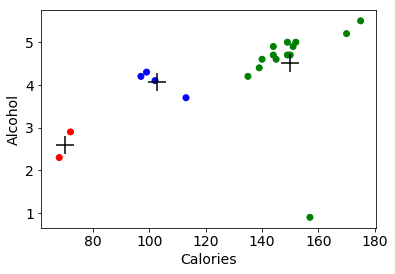

In [24]:
plt.scatter(beer['calories'],beer['alcohol'],c=colors[beer['cluster']])
plt.scatter(centers.calories,centers.alcohol,linewidths=3,marker='+',s=300,c='black')

plt.xlabel('Calories')
plt.ylabel('Alcohol')


Text(0.5, 0.98, 'With 3 centroids initialized ')

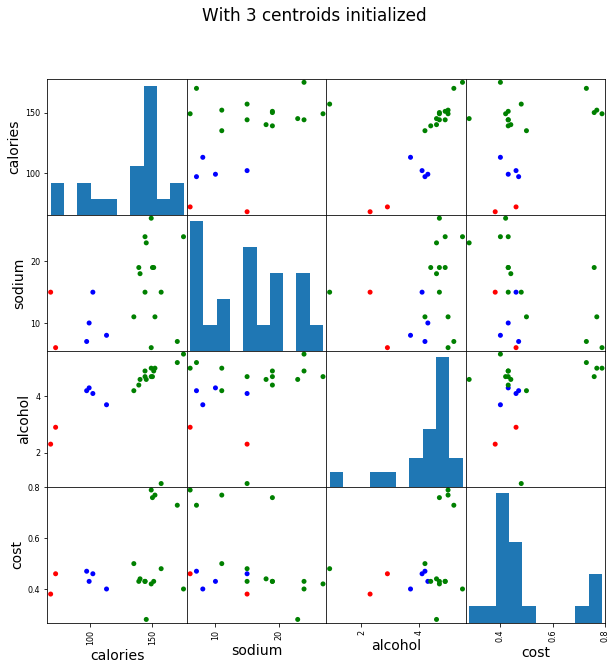

In [25]:
scatter_matrix(beer[['calories','sodium','alcohol','cost']],s=100,alpha=1,c=colors[beer['cluster']],figsize=(10, 10))
plt.suptitle('With 3 centroids initialized ')

### sklearn data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [27]:
km=KMeans(n_clusters=3).fit(X_scaled)

In [28]:
beer['scaled_cluster']=km.labels_
beer.sort_values('scaled_cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
14,Kirin,149,6,5.0,0.79,1,0,0
3,Kronenbourg,170,7,5.2,0.73,1,0,0
4,Heineken,152,11,5.0,0.77,1,0,0
13,Becks,150,19,4.7,0.76,1,0,0
9,Budweiser_Light,113,8,3.7,0.40,2,1,1
15,Pabst_Extra_Light,68,15,2.3,0.38,0,1,1
12,Michelob_Light,135,11,4.2,0.50,1,0,1
11,Coors_Light,102,15,4.1,0.46,2,1,1
18,Olympia_Goled_Light,72,6,2.9,0.46,0,1,1
19,Schlitz_Light,97,7,4.2,0.47,2,1,1


In [29]:
beer.groupby('scaled_cluster').mean()

,calories,sodium,alcohol,cost,cluster,cluster2
scaled_cluster,,,,,,
0,155.250,10.750,4.9750,0.7625,1.00,0.00
1,105.375,10.875,3.3250,0.4475,1.25,0.75
2,148.375,21.125,4.7875,0.4075,1.00,0.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029DC26AE400>,
      dtype=object)

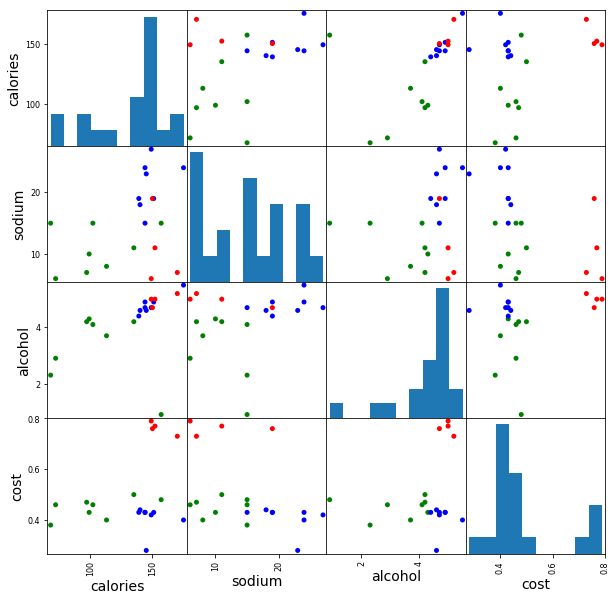

In [32]:
pd.plotting.scatter_matrix(X,c=colors[beer.scaled_cluster],alpha=1,figsize=(10,10),s=100)

In [33]:
from sklearn import metrics 
score_scaled=metrics.silhouette_score(X,beer.scaled_cluster)
score=metrics.silhouette_score(X,beer.cluster)
print(score_scaled,score)

0.1797806808940007 0.6731775046455796


In [35]:
scores=[]
for k in range(2,20):
    labels=KMeans(n_clusters=k).fit(X).labels_
    score=metrics.silhouette_score(X,labels)
    scores.append(score)
    
scores

[0.6917656034079486,
 0.6731775046455796,
 0.5857040721127795,
 0.422548733517202,
 0.4559182167013377,
 0.43776116697963124,
 0.38946337473125997,
 0.39746405172426014,
 0.3915697409245163,
 0.41282646329875183,
 0.3459775237127248,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.2849514001174898,
 0.23498077333071996,
 0.1588091017496281,
 0.08423051380151177]